<a href="https://colab.research.google.com/github/thedavidemmanuel/math_for_ml/blob/main/Formative_one_visualization/Plotting_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Plotting - Matplotlib Seaborn, Histograms and Boxplots**

The most recent ASC23 considered four major systems-based tracks with a view to providing region-focused contributions to inform the global stocktake among them Cities, urban and rural settlements, infrastructure, and transport.

In this assignment, you will be performing analysis more specifically on transport (vehicles and fuel efficiency).

The dataset has been provided for you.

You are tasked to make sense of this data that will later be used for AI purposes.

In [4]:
# prerequisite package imports

#YOUR CODE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


:We'll work with the fuel economy dataset in this workspace.

Load the dataset and print at least 10 rows

1.   Load the dataset
2.   print atleast 10 rows of it



In [16]:
#YOUR CODE
file_path = '/content/drive/My Drive/Mathematics For ML/fuel_econ.csv'
data = pd.read_csv(file_path)
# Display the first 10 rows of the dataframe
print(data.head(10))


      id        make           model  year           VClass  \
0  32204      Nissan            GT-R  2013  Subcompact Cars   
1  32205  Volkswagen              CC  2013     Compact Cars   
2  32206  Volkswagen              CC  2013     Compact Cars   
3  32207  Volkswagen      CC 4motion  2013     Compact Cars   
4  32208   Chevrolet  Malibu eAssist  2013     Midsize Cars   
5  32209       Lexus          GS 350  2013     Midsize Cars   
6  32210       Lexus      GS 350 AWD  2013     Midsize Cars   
7  32214     Hyundai   Genesis Coupe  2013  Subcompact Cars   
8  32215     Hyundai   Genesis Coupe  2013  Subcompact Cars   
9  32216     Hyundai   Genesis Coupe  2013  Subcompact Cars   

               drive              trans          fuelType  cylinders  displ  \
0    All-Wheel Drive    Automatic (AM6)  Premium Gasoline          6    3.8   
1  Front-Wheel Drive  Automatic (AM-S6)  Premium Gasoline          4    2.0   
2  Front-Wheel Drive     Automatic (S6)  Premium Gasoline          6 

Play Around with Bin size as you create your Histogram

[Bin size in Matplot Lib](https://www.geeksforgeeks.org/bin-size-in-matplotlib-histogram/)

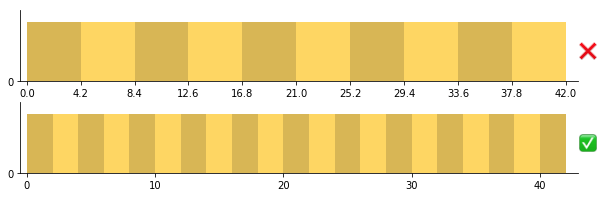

 **Description**
The dataset has a number of different statistics that describe fuel efficiency.


**TO DO**:
1.   create a _histogram_ that depicts the distribution of carbon Dioxide
2.   Play  around with different bin width sizes to see what best depicts the data

Create 2 more histograms based on columns of your choice








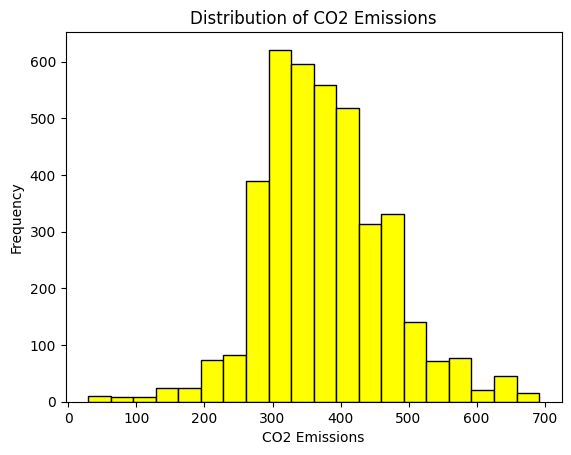

In [11]:
# Histogram for CO2 emissions
plt.hist(data['co2'], bins=20, color='yellow', edgecolor='black')
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.show()

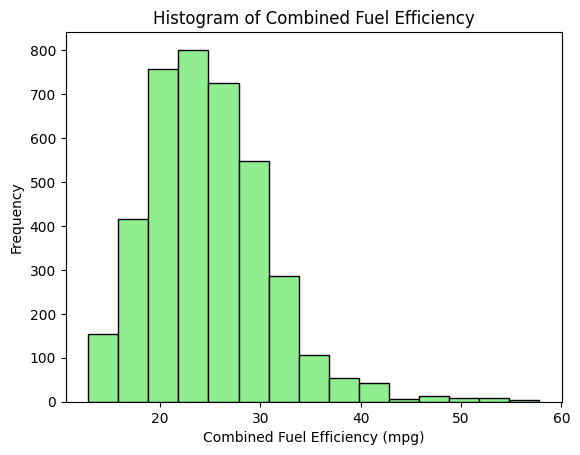

In [12]:
# Histogram for combined fuel efficiency with 15 bins
plt.hist(data['comb'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Histogram of Combined Fuel Efficiency')
plt.xlabel('Combined Fuel Efficiency (mpg)')
plt.ylabel('Frequency')
plt.show()

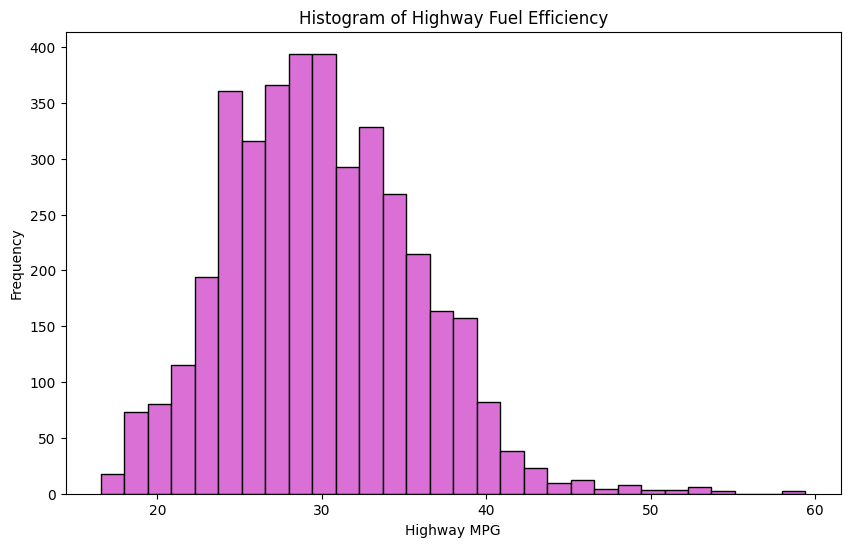

In [14]:
# Create a histogram for highway fuel efficiency
plt.figure(figsize=(10, 6))
plt.hist(data['highway'], bins=30, color='orchid', edgecolor='black')
plt.title('Histogram of Highway Fuel Efficiency')
plt.xlabel('Highway MPG')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**TO DO: Write Code that will give you the following plot as below:**

1.   create a heat map of the data
2.Interpret the data - What story does the visualization tell?

>

Finally What Columns would you delete Drop if the target is the ghg score? Justify your Answer





---

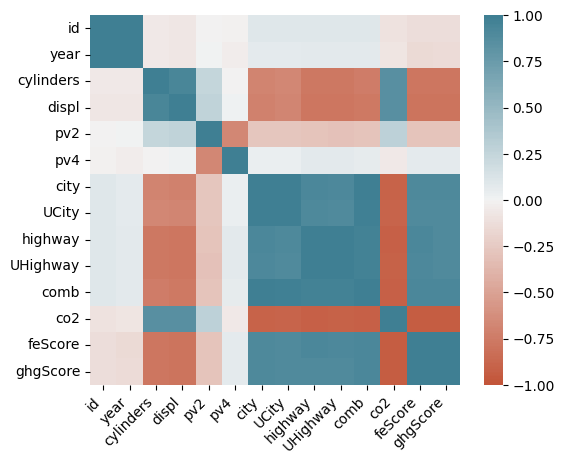

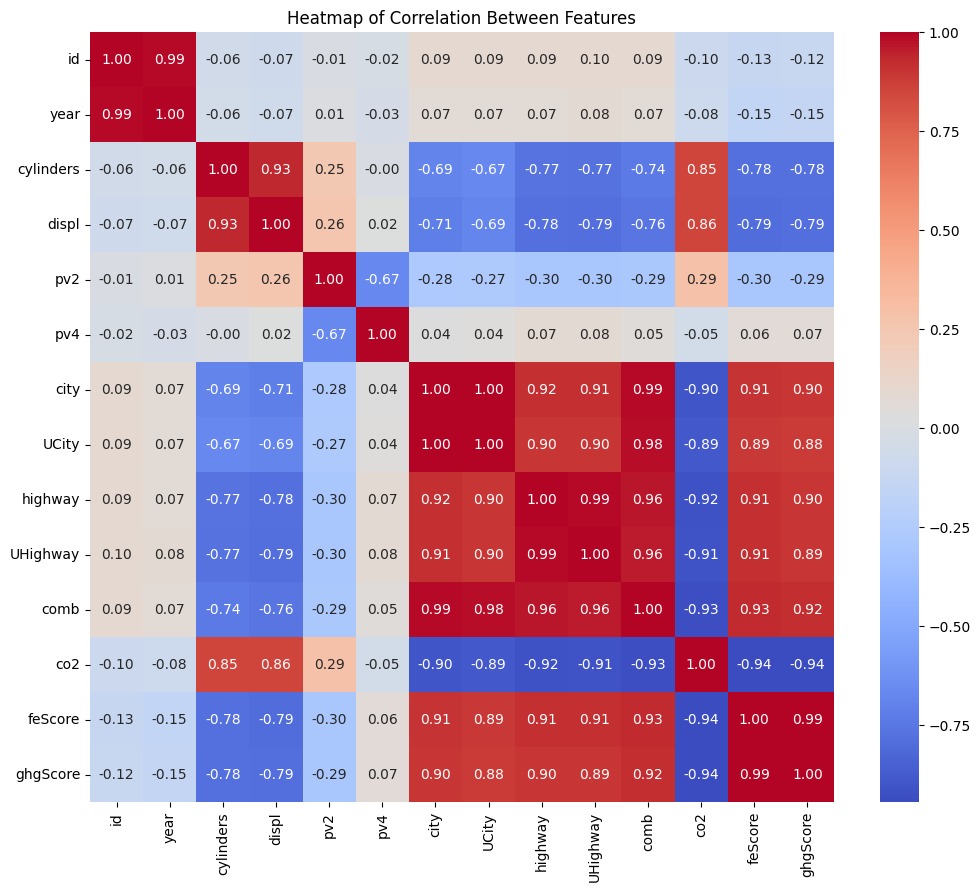

In [17]:
# Heatmap for correlations
plt.figure(figsize=(12, 10))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Between Features')
plt.show()


# Heatmap Interpretation

The heatmap displays several key correlations in the dataset:

- There is a strong positive correlation between `city`, `UCity`, `highway`, `UHighway`, and `comb`, which are all related to fuel efficiency. This indicates that as one metric of fuel efficiency improves, the others are likely to improve as well.

- There is a strong negative correlation between CO2 emissions (`co2`) and fuel efficiency metrics. This suggests that vehicles with higher fuel efficiency emit less CO2.

- The number of `cylinders` and engine `displ` (displacement) are positively correlated with CO2 emissions and negatively correlated with fuel efficiency, indicating that larger, more powerful engines tend to be less fuel-efficient and emit more CO2.

- Fuel economy scores (`feScore` and `ghgScore`) are positively correlated with fuel efficiency and negatively correlated with CO2 emissions, which aligns with their intended purpose of indicating more environmentally friendly vehicles.

## Columns I'd drop

I'd drop the following columns when predicting the greenhouse gas (ghg) score:

- `id`: This is simply a unique identifier for each entry and does not hold any intrinsic predictive value for the ghg score.
- `year`: Unless the criteria for ghg scoring has changed significantly over the years, this column may not be directly relevant to the target variable.

For highly correlated features such as `city`, `UCity`, `highway`, `UHighway`, and `comb`, which all measure aspects of fuel efficiency, I'd consider retaining only those with the strongest correlation to the ghg score to reduce multicollinearity.

- `feScore`: If this is derived from the same process as the ghg score or closely related to it, keeping this feature could lead to data leakage, where the model inadvertently learns to predict the target from features that won't be available in the actual usage scenario.

Regarding engine-related features:

- `cylinders` and `displ` (engine displacement): While they are related to engine power and efficiency, if these features are represented by other variables or show a weak relationship with the ghg score, they might be redundant.

Lastly, the significance of `drive`, `trans`, `pv2`, and `pv4` should be evaluated. If they don't exhibit a strong relationship with the ghg score or their meanings are not clear, they would also be candidates for removal.

The decision to drop these columns is backed by a combination of domain knowledge, exploratory data analysis, and the intent to prevent issues such as multicollinearity and data leakage in our predictive modeling.

